In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen=ImageDataGenerator(rescale=1/255)

In [4]:
train_data=datagen.flow_from_directory(r"C:\Users\Neha\Downloads\11 Flowers-20241106T062352Z-001\11 Flowers\train",
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical')

Found 3250 images belonging to 5 classes.


In [5]:
test_data=datagen.flow_from_directory(r"C:\Users\Neha\Downloads\11 Flowers-20241106T062352Z-001\11 Flowers\test",
                                     target_size=(224,224),
                                     batch_size=32,
                                     class_mode='categorical')

Found 530 images belonging to 5 classes.


In [6]:
base_model=MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable=False   #freeze the base model to retain pretrained weights

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
model=models.Sequential()

model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_data.num_classes,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
history=model.fit(train_data,epochs=15)

Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 410ms/step - accuracy: 0.8846 - loss: 0.3115
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 44s 422ms/step - accuracy: 0.8652 - loss: 0.3578
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 418ms/step - accuracy: 0.8845 - loss: 0.3094
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 414ms/step - accuracy: 0.8983 - loss: 0.2989
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 413ms/step - accuracy: 0.8870 - loss: 0.3135
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 409ms/step - accuracy: 0.8881 - loss: 0.2983
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 414ms/step - accuracy: 0.8919 - loss: 0.3005
Epoch 8/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 414ms/step - accuracy: 0.8819 - loss: 0.3301
Epoch 9/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 44s 420ms/step - accuracy: 0.8872 - loss: 0.3088
Epoch 10/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 433ms/step - accuracy: 0.9008 - loss: 0.2739
Epoch 11/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 434ms/step - accuracy: 0.8927 - loss: 0.2832
Epoch 12/15
102/102

In [34]:
test_accuracy,test_loss=model.evaluate(test_data)
print(test_loss,test_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.9150 - loss: 0.4634
0.8962264060974121 0.49812614917755127


In [35]:
predictions=model.predict(test_data)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step


In [36]:
predictions

array([[1.6490925e-15, 1.4669013e-11, 9.2544828e-17, 1.0000000e+00,
        3.2725372e-12],
       [1.7363340e-17, 7.0983676e-24, 1.0000000e+00, 1.5911439e-18,
        3.7268753e-09],
       [2.8178595e-06, 1.7279723e-08, 3.8841563e-01, 2.4093063e-07,
        6.1158127e-01],
       ...,
       [3.6273736e-16, 1.3512150e-12, 1.0503524e-15, 1.0000000e+00,
        2.6597852e-10],
       [1.3572804e-11, 1.0000000e+00, 3.2393712e-18, 7.4373050e-14,
        1.6181008e-18],
       [2.7942966e-30, 1.7605669e-30, 1.5232418e-12, 4.9639424e-29,
        1.0000000e+00]], dtype=float32)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
24
Actual Value: dandelion
Predicted Value: dandelion


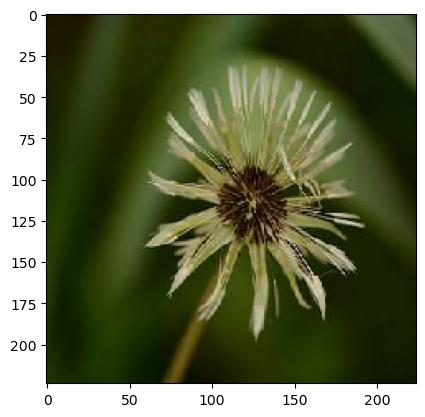

In [52]:
import random
import matplotlib.pyplot as plt
import numpy as np

class_names=list(train_data.class_indices.keys())
print(class_names)

# Randomly select an index for testing
n = random.randint(0, len(test_data[0][0]) - 1)
print(n)

# Display the selected image
plt.imshow(test_data[0][0][n])

# Print the actual label
actual_label_index = np.argmax(test_data[0][1][n])  # Get the index of the actual label
print("Actual Value:", class_names[actual_label_index])

# Predicted label
predicted_index = np.argmax(predictions[n])  # Assuming predictions[n] has probabilities for each class
print("Predicted Value:", class_names[predicted_index])
